## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.2ms	remaining: 49.2s
1:	learn: 0.9301086	total: 51.6ms	remaining: 25.7s
2:	learn: 0.9005637	total: 53.5ms	remaining: 17.8s
3:	learn: 0.8720983	total: 55.8ms	remaining: 13.9s
4:	learn: 0.8467410	total: 57.9ms	remaining: 11.5s
5:	learn: 0.8226672	total: 59.9ms	remaining: 9.92s
6:	learn: 0.7994702	total: 61.8ms	remaining: 8.76s
7:	learn: 0.7784272	total: 63.7ms	remaining: 7.9s
8:	learn: 0.7602192	total: 65.7ms	remaining: 7.23s
9:	learn: 0.7412421	total: 67.7ms	remaining: 6.7s
10:	learn: 0.7247930	total: 69.6ms	remaining: 6.26s
11:	learn: 0.7089951	total: 71.6ms	remaining: 5.89s
12:	learn: 0.6951345	total: 73.5ms	remaining: 5.58s
13:	learn: 0.6809276	total: 75.5ms	remaining: 5.32s
14:	learn: 0.6692630	total: 77.4ms	remaining: 5.08s
15:	learn: 0.6588323	total: 79.2ms	remaining: 4.87s
16:	learn: 0.6472700	total: 81.3ms	remaining: 4.7s
17:	learn: 0.6379982	total: 83.3ms	remaining: 4.54s
18:	learn: 0.6294674	total: 85.2ms	remaining: 4.4s
19:	learn: 0.6193295	total

59:	learn: 0.4824455	total: 167ms	remaining: 2.61s
60:	learn: 0.4809744	total: 169ms	remaining: 2.59s
61:	learn: 0.4801376	total: 170ms	remaining: 2.58s
62:	learn: 0.4792422	total: 172ms	remaining: 2.56s
63:	learn: 0.4780719	total: 174ms	remaining: 2.55s
64:	learn: 0.4771984	total: 176ms	remaining: 2.54s
65:	learn: 0.4759610	total: 178ms	remaining: 2.52s
66:	learn: 0.4750287	total: 180ms	remaining: 2.51s
67:	learn: 0.4740093	total: 182ms	remaining: 2.5s
68:	learn: 0.4732612	total: 184ms	remaining: 2.48s
69:	learn: 0.4727266	total: 186ms	remaining: 2.47s
70:	learn: 0.4716549	total: 188ms	remaining: 2.46s
71:	learn: 0.4709088	total: 190ms	remaining: 2.45s
72:	learn: 0.4697594	total: 192ms	remaining: 2.44s
73:	learn: 0.4690934	total: 194ms	remaining: 2.43s
74:	learn: 0.4680942	total: 196ms	remaining: 2.42s
75:	learn: 0.4672726	total: 198ms	remaining: 2.4s
76:	learn: 0.4664479	total: 200ms	remaining: 2.4s
77:	learn: 0.4656044	total: 202ms	remaining: 2.38s
78:	learn: 0.4645375	total: 204ms	

83:	learn: 0.4604376	total: 214ms	remaining: 2.33s
84:	learn: 0.4596603	total: 216ms	remaining: 2.32s
85:	learn: 0.4587835	total: 218ms	remaining: 2.31s
86:	learn: 0.4583577	total: 220ms	remaining: 2.31s
87:	learn: 0.4577999	total: 222ms	remaining: 2.3s
88:	learn: 0.4572657	total: 224ms	remaining: 2.29s
89:	learn: 0.4569360	total: 225ms	remaining: 2.28s
90:	learn: 0.4559969	total: 227ms	remaining: 2.27s
91:	learn: 0.4549716	total: 229ms	remaining: 2.26s
92:	learn: 0.4544919	total: 231ms	remaining: 2.25s
93:	learn: 0.4537693	total: 233ms	remaining: 2.25s
94:	learn: 0.4532673	total: 235ms	remaining: 2.24s
95:	learn: 0.4526987	total: 237ms	remaining: 2.23s
96:	learn: 0.4520952	total: 239ms	remaining: 2.22s
97:	learn: 0.4513919	total: 241ms	remaining: 2.21s
98:	learn: 0.4503747	total: 243ms	remaining: 2.21s
99:	learn: 0.4494783	total: 245ms	remaining: 2.2s
100:	learn: 0.4487329	total: 246ms	remaining: 2.19s
101:	learn: 0.4481325	total: 249ms	remaining: 2.19s
102:	learn: 0.4475445	total: 25

142:	learn: 0.4282748	total: 332ms	remaining: 1.99s
143:	learn: 0.4277528	total: 334ms	remaining: 1.98s
144:	learn: 0.4274087	total: 336ms	remaining: 1.98s
145:	learn: 0.4271984	total: 338ms	remaining: 1.97s
146:	learn: 0.4268458	total: 340ms	remaining: 1.97s
147:	learn: 0.4264987	total: 342ms	remaining: 1.97s
148:	learn: 0.4262192	total: 344ms	remaining: 1.96s
149:	learn: 0.4257966	total: 346ms	remaining: 1.96s
150:	learn: 0.4253062	total: 348ms	remaining: 1.95s
151:	learn: 0.4247446	total: 350ms	remaining: 1.95s
152:	learn: 0.4237365	total: 351ms	remaining: 1.95s
153:	learn: 0.4233079	total: 353ms	remaining: 1.94s
154:	learn: 0.4228876	total: 355ms	remaining: 1.94s
155:	learn: 0.4225404	total: 357ms	remaining: 1.93s
156:	learn: 0.4222831	total: 359ms	remaining: 1.93s
157:	learn: 0.4218088	total: 361ms	remaining: 1.93s
158:	learn: 0.4213239	total: 363ms	remaining: 1.92s
159:	learn: 0.4210022	total: 365ms	remaining: 1.92s
160:	learn: 0.4201256	total: 367ms	remaining: 1.91s
161:	learn: 

166:	learn: 0.4176884	total: 380ms	remaining: 1.89s
167:	learn: 0.4173026	total: 382ms	remaining: 1.89s
168:	learn: 0.4170486	total: 384ms	remaining: 1.89s
169:	learn: 0.4165960	total: 386ms	remaining: 1.88s
170:	learn: 0.4161870	total: 388ms	remaining: 1.88s
171:	learn: 0.4156228	total: 390ms	remaining: 1.88s
172:	learn: 0.4153041	total: 392ms	remaining: 1.87s
173:	learn: 0.4148857	total: 394ms	remaining: 1.87s
174:	learn: 0.4144190	total: 396ms	remaining: 1.87s
175:	learn: 0.4140875	total: 398ms	remaining: 1.86s
176:	learn: 0.4136755	total: 400ms	remaining: 1.86s
177:	learn: 0.4133860	total: 402ms	remaining: 1.86s
178:	learn: 0.4129780	total: 404ms	remaining: 1.85s
179:	learn: 0.4122907	total: 406ms	remaining: 1.85s
180:	learn: 0.4119188	total: 408ms	remaining: 1.84s
181:	learn: 0.4115412	total: 410ms	remaining: 1.84s
182:	learn: 0.4112620	total: 412ms	remaining: 1.84s
183:	learn: 0.4107734	total: 414ms	remaining: 1.83s
184:	learn: 0.4104881	total: 416ms	remaining: 1.83s
185:	learn: 

224:	learn: 0.3973704	total: 497ms	remaining: 1.71s
225:	learn: 0.3971729	total: 499ms	remaining: 1.71s
226:	learn: 0.3968841	total: 501ms	remaining: 1.71s
227:	learn: 0.3965787	total: 503ms	remaining: 1.7s
228:	learn: 0.3963073	total: 505ms	remaining: 1.7s
229:	learn: 0.3960925	total: 507ms	remaining: 1.7s
230:	learn: 0.3957018	total: 509ms	remaining: 1.69s
231:	learn: 0.3954162	total: 511ms	remaining: 1.69s
232:	learn: 0.3951665	total: 513ms	remaining: 1.69s
233:	learn: 0.3949269	total: 514ms	remaining: 1.68s
234:	learn: 0.3945894	total: 516ms	remaining: 1.68s
235:	learn: 0.3944181	total: 518ms	remaining: 1.68s
236:	learn: 0.3941497	total: 520ms	remaining: 1.67s
237:	learn: 0.3939819	total: 522ms	remaining: 1.67s
238:	learn: 0.3938322	total: 524ms	remaining: 1.67s
239:	learn: 0.3935463	total: 526ms	remaining: 1.67s
240:	learn: 0.3933166	total: 528ms	remaining: 1.66s
241:	learn: 0.3930992	total: 530ms	remaining: 1.66s
242:	learn: 0.3928898	total: 532ms	remaining: 1.66s
243:	learn: 0.3

249:	learn: 0.3912759	total: 546ms	remaining: 1.64s
250:	learn: 0.3908375	total: 548ms	remaining: 1.64s
251:	learn: 0.3904815	total: 550ms	remaining: 1.63s
252:	learn: 0.3902127	total: 552ms	remaining: 1.63s
253:	learn: 0.3900274	total: 554ms	remaining: 1.63s
254:	learn: 0.3898171	total: 556ms	remaining: 1.62s
255:	learn: 0.3896180	total: 558ms	remaining: 1.62s
256:	learn: 0.3894251	total: 560ms	remaining: 1.62s
257:	learn: 0.3892139	total: 562ms	remaining: 1.62s
258:	learn: 0.3889352	total: 564ms	remaining: 1.61s
259:	learn: 0.3886531	total: 566ms	remaining: 1.61s
260:	learn: 0.3884539	total: 568ms	remaining: 1.61s
261:	learn: 0.3882459	total: 570ms	remaining: 1.61s
262:	learn: 0.3881101	total: 572ms	remaining: 1.6s
263:	learn: 0.3879324	total: 574ms	remaining: 1.6s
264:	learn: 0.3876861	total: 576ms	remaining: 1.6s
265:	learn: 0.3874255	total: 578ms	remaining: 1.59s
266:	learn: 0.3868515	total: 580ms	remaining: 1.59s
267:	learn: 0.3866114	total: 582ms	remaining: 1.59s
268:	learn: 0.3

307:	learn: 0.3781631	total: 663ms	remaining: 1.49s
308:	learn: 0.3779278	total: 665ms	remaining: 1.49s
309:	learn: 0.3777358	total: 667ms	remaining: 1.49s
310:	learn: 0.3775809	total: 669ms	remaining: 1.48s
311:	learn: 0.3774323	total: 671ms	remaining: 1.48s
312:	learn: 0.3772732	total: 673ms	remaining: 1.48s
313:	learn: 0.3771184	total: 675ms	remaining: 1.47s
314:	learn: 0.3769370	total: 677ms	remaining: 1.47s
315:	learn: 0.3766643	total: 679ms	remaining: 1.47s
316:	learn: 0.3764891	total: 681ms	remaining: 1.47s
317:	learn: 0.3762751	total: 683ms	remaining: 1.46s
318:	learn: 0.3761284	total: 685ms	remaining: 1.46s
319:	learn: 0.3760168	total: 687ms	remaining: 1.46s
320:	learn: 0.3757763	total: 689ms	remaining: 1.46s
321:	learn: 0.3756076	total: 691ms	remaining: 1.45s
322:	learn: 0.3754123	total: 693ms	remaining: 1.45s
323:	learn: 0.3751852	total: 695ms	remaining: 1.45s
324:	learn: 0.3750004	total: 697ms	remaining: 1.45s
325:	learn: 0.3749086	total: 699ms	remaining: 1.44s
326:	learn: 

331:	learn: 0.3736647	total: 710ms	remaining: 1.43s
332:	learn: 0.3733429	total: 713ms	remaining: 1.43s
333:	learn: 0.3732059	total: 715ms	remaining: 1.43s
334:	learn: 0.3730574	total: 717ms	remaining: 1.42s
335:	learn: 0.3728663	total: 719ms	remaining: 1.42s
336:	learn: 0.3727111	total: 721ms	remaining: 1.42s
337:	learn: 0.3724765	total: 722ms	remaining: 1.41s
338:	learn: 0.3722959	total: 724ms	remaining: 1.41s
339:	learn: 0.3720213	total: 726ms	remaining: 1.41s
340:	learn: 0.3718316	total: 728ms	remaining: 1.41s
341:	learn: 0.3716519	total: 730ms	remaining: 1.4s
342:	learn: 0.3714592	total: 732ms	remaining: 1.4s
343:	learn: 0.3713389	total: 734ms	remaining: 1.4s
344:	learn: 0.3711642	total: 736ms	remaining: 1.4s
345:	learn: 0.3709569	total: 738ms	remaining: 1.4s
346:	learn: 0.3708184	total: 740ms	remaining: 1.39s
347:	learn: 0.3705958	total: 742ms	remaining: 1.39s
348:	learn: 0.3703798	total: 744ms	remaining: 1.39s
349:	learn: 0.3701923	total: 746ms	remaining: 1.39s
350:	learn: 0.370

390:	learn: 0.3637044	total: 829ms	remaining: 1.29s
391:	learn: 0.3636336	total: 831ms	remaining: 1.29s
392:	learn: 0.3635003	total: 833ms	remaining: 1.29s
393:	learn: 0.3633029	total: 835ms	remaining: 1.28s
394:	learn: 0.3632136	total: 837ms	remaining: 1.28s
395:	learn: 0.3629529	total: 839ms	remaining: 1.28s
396:	learn: 0.3627743	total: 841ms	remaining: 1.28s
397:	learn: 0.3626747	total: 843ms	remaining: 1.27s
398:	learn: 0.3625881	total: 845ms	remaining: 1.27s
399:	learn: 0.3622963	total: 847ms	remaining: 1.27s
400:	learn: 0.3622314	total: 849ms	remaining: 1.27s
401:	learn: 0.3620143	total: 851ms	remaining: 1.26s
402:	learn: 0.3618403	total: 853ms	remaining: 1.26s
403:	learn: 0.3616747	total: 855ms	remaining: 1.26s
404:	learn: 0.3614255	total: 857ms	remaining: 1.26s
405:	learn: 0.3613607	total: 859ms	remaining: 1.26s
406:	learn: 0.3612875	total: 861ms	remaining: 1.25s
407:	learn: 0.3611516	total: 863ms	remaining: 1.25s
408:	learn: 0.3609621	total: 865ms	remaining: 1.25s
409:	learn: 

413:	learn: 0.3599094	total: 876ms	remaining: 1.24s
414:	learn: 0.3597887	total: 878ms	remaining: 1.24s
415:	learn: 0.3595791	total: 880ms	remaining: 1.24s
416:	learn: 0.3594487	total: 883ms	remaining: 1.23s
417:	learn: 0.3592759	total: 885ms	remaining: 1.23s
418:	learn: 0.3591088	total: 887ms	remaining: 1.23s
419:	learn: 0.3589470	total: 889ms	remaining: 1.23s
420:	learn: 0.3587972	total: 891ms	remaining: 1.23s
421:	learn: 0.3586831	total: 893ms	remaining: 1.22s
422:	learn: 0.3585620	total: 895ms	remaining: 1.22s
423:	learn: 0.3584427	total: 897ms	remaining: 1.22s
424:	learn: 0.3583044	total: 899ms	remaining: 1.22s
425:	learn: 0.3581698	total: 901ms	remaining: 1.21s
426:	learn: 0.3580461	total: 903ms	remaining: 1.21s
427:	learn: 0.3579182	total: 905ms	remaining: 1.21s
428:	learn: 0.3577521	total: 907ms	remaining: 1.21s
429:	learn: 0.3576138	total: 909ms	remaining: 1.21s
430:	learn: 0.3575528	total: 911ms	remaining: 1.2s
431:	learn: 0.3574686	total: 913ms	remaining: 1.2s
432:	learn: 0.

471:	learn: 0.3518082	total: 997ms	remaining: 1.11s
472:	learn: 0.3516593	total: 999ms	remaining: 1.11s
473:	learn: 0.3514906	total: 1s	remaining: 1.11s
474:	learn: 0.3513843	total: 1s	remaining: 1.11s
475:	learn: 0.3512406	total: 1s	remaining: 1.1s
476:	learn: 0.3510044	total: 1.01s	remaining: 1.1s
477:	learn: 0.3509121	total: 1.01s	remaining: 1.1s
478:	learn: 0.3507270	total: 1.01s	remaining: 1.1s
479:	learn: 0.3506003	total: 1.01s	remaining: 1.1s
480:	learn: 0.3505111	total: 1.01s	remaining: 1.09s
481:	learn: 0.3503906	total: 1.02s	remaining: 1.09s
482:	learn: 0.3501522	total: 1.02s	remaining: 1.09s
483:	learn: 0.3500494	total: 1.02s	remaining: 1.09s
484:	learn: 0.3498921	total: 1.02s	remaining: 1.09s
485:	learn: 0.3497143	total: 1.02s	remaining: 1.08s
486:	learn: 0.3496172	total: 1.03s	remaining: 1.08s
487:	learn: 0.3494609	total: 1.03s	remaining: 1.08s
488:	learn: 0.3493200	total: 1.03s	remaining: 1.08s
489:	learn: 0.3491550	total: 1.03s	remaining: 1.07s
490:	learn: 0.3490323	tota

493:	learn: 0.3486318	total: 1.04s	remaining: 1.07s
494:	learn: 0.3485016	total: 1.04s	remaining: 1.06s
495:	learn: 0.3484072	total: 1.04s	remaining: 1.06s
496:	learn: 0.3482698	total: 1.05s	remaining: 1.06s
497:	learn: 0.3481630	total: 1.05s	remaining: 1.06s
498:	learn: 0.3480855	total: 1.05s	remaining: 1.06s
499:	learn: 0.3478655	total: 1.05s	remaining: 1.05s
500:	learn: 0.3477966	total: 1.06s	remaining: 1.05s
501:	learn: 0.3476142	total: 1.06s	remaining: 1.05s
502:	learn: 0.3474667	total: 1.06s	remaining: 1.05s
503:	learn: 0.3473844	total: 1.06s	remaining: 1.04s
504:	learn: 0.3471852	total: 1.06s	remaining: 1.04s
505:	learn: 0.3471124	total: 1.07s	remaining: 1.04s
506:	learn: 0.3469987	total: 1.07s	remaining: 1.04s
507:	learn: 0.3469000	total: 1.07s	remaining: 1.04s
508:	learn: 0.3467621	total: 1.07s	remaining: 1.03s
509:	learn: 0.3466653	total: 1.07s	remaining: 1.03s
510:	learn: 0.3465795	total: 1.08s	remaining: 1.03s
511:	learn: 0.3464899	total: 1.08s	remaining: 1.03s
512:	learn: 

548:	learn: 0.3416228	total: 1.16s	remaining: 953ms
549:	learn: 0.3414331	total: 1.16s	remaining: 951ms
550:	learn: 0.3413090	total: 1.16s	remaining: 949ms
551:	learn: 0.3411591	total: 1.17s	remaining: 947ms
552:	learn: 0.3410901	total: 1.17s	remaining: 945ms
553:	learn: 0.3409923	total: 1.17s	remaining: 943ms
554:	learn: 0.3408730	total: 1.17s	remaining: 941ms
555:	learn: 0.3408310	total: 1.17s	remaining: 938ms
556:	learn: 0.3407365	total: 1.18s	remaining: 936ms
557:	learn: 0.3406506	total: 1.18s	remaining: 934ms
558:	learn: 0.3405352	total: 1.18s	remaining: 932ms
559:	learn: 0.3404352	total: 1.18s	remaining: 930ms
560:	learn: 0.3403419	total: 1.19s	remaining: 928ms
561:	learn: 0.3402836	total: 1.19s	remaining: 925ms
562:	learn: 0.3402264	total: 1.19s	remaining: 923ms
563:	learn: 0.3400466	total: 1.19s	remaining: 921ms
564:	learn: 0.3399235	total: 1.19s	remaining: 919ms
565:	learn: 0.3398064	total: 1.2s	remaining: 917ms
566:	learn: 0.3396466	total: 1.2s	remaining: 915ms
567:	learn: 0.

569:	learn: 0.3393241	total: 1.2s	remaining: 909ms
570:	learn: 0.3392368	total: 1.21s	remaining: 907ms
571:	learn: 0.3391373	total: 1.21s	remaining: 905ms
572:	learn: 0.3390261	total: 1.21s	remaining: 903ms
573:	learn: 0.3389126	total: 1.21s	remaining: 900ms
574:	learn: 0.3388268	total: 1.22s	remaining: 899ms
575:	learn: 0.3387474	total: 1.22s	remaining: 896ms
576:	learn: 0.3386361	total: 1.22s	remaining: 894ms
577:	learn: 0.3385706	total: 1.22s	remaining: 892ms
578:	learn: 0.3384814	total: 1.22s	remaining: 890ms
579:	learn: 0.3383559	total: 1.23s	remaining: 888ms
580:	learn: 0.3382469	total: 1.23s	remaining: 886ms
581:	learn: 0.3381645	total: 1.23s	remaining: 884ms
582:	learn: 0.3380538	total: 1.23s	remaining: 881ms
583:	learn: 0.3379690	total: 1.23s	remaining: 879ms
584:	learn: 0.3378924	total: 1.24s	remaining: 877ms
585:	learn: 0.3378307	total: 1.24s	remaining: 875ms
586:	learn: 0.3377186	total: 1.24s	remaining: 873ms
587:	learn: 0.3376434	total: 1.24s	remaining: 871ms
588:	learn: 0

626:	learn: 0.3336593	total: 1.33s	remaining: 791ms
627:	learn: 0.3335713	total: 1.33s	remaining: 789ms
628:	learn: 0.3333915	total: 1.33s	remaining: 787ms
629:	learn: 0.3333158	total: 1.34s	remaining: 785ms
630:	learn: 0.3332088	total: 1.34s	remaining: 783ms
631:	learn: 0.3331129	total: 1.34s	remaining: 781ms
632:	learn: 0.3330288	total: 1.34s	remaining: 779ms
633:	learn: 0.3328844	total: 1.34s	remaining: 777ms
634:	learn: 0.3328544	total: 1.35s	remaining: 775ms
635:	learn: 0.3327021	total: 1.35s	remaining: 773ms
636:	learn: 0.3326462	total: 1.35s	remaining: 770ms
637:	learn: 0.3325758	total: 1.35s	remaining: 768ms
638:	learn: 0.3324324	total: 1.36s	remaining: 766ms
639:	learn: 0.3323174	total: 1.36s	remaining: 764ms
640:	learn: 0.3322206	total: 1.36s	remaining: 762ms
641:	learn: 0.3321031	total: 1.36s	remaining: 760ms
642:	learn: 0.3319978	total: 1.36s	remaining: 758ms
643:	learn: 0.3319044	total: 1.37s	remaining: 756ms
644:	learn: 0.3318169	total: 1.37s	remaining: 754ms


645:	learn: 0.3316585	total: 1.37s	remaining: 752ms
646:	learn: 0.3316256	total: 1.37s	remaining: 750ms
647:	learn: 0.3315220	total: 1.38s	remaining: 748ms
648:	learn: 0.3313829	total: 1.38s	remaining: 746ms
649:	learn: 0.3313125	total: 1.38s	remaining: 744ms
650:	learn: 0.3311735	total: 1.38s	remaining: 742ms
651:	learn: 0.3310386	total: 1.39s	remaining: 740ms
652:	learn: 0.3309129	total: 1.39s	remaining: 738ms
653:	learn: 0.3308321	total: 1.39s	remaining: 736ms
654:	learn: 0.3307342	total: 1.39s	remaining: 733ms
655:	learn: 0.3306809	total: 1.39s	remaining: 731ms
656:	learn: 0.3305729	total: 1.4s	remaining: 729ms
657:	learn: 0.3304900	total: 1.4s	remaining: 727ms
658:	learn: 0.3303842	total: 1.4s	remaining: 725ms
659:	learn: 0.3302235	total: 1.4s	remaining: 723ms
660:	learn: 0.3300983	total: 1.41s	remaining: 721ms
661:	learn: 0.3299994	total: 1.41s	remaining: 719ms
662:	learn: 0.3299184	total: 1.41s	remaining: 717ms
663:	learn: 0.3298189	total: 1.41s	remaining: 715ms
664:	learn: 0.32

705:	learn: 0.3259475	total: 1.49s	remaining: 623ms
706:	learn: 0.3258911	total: 1.5s	remaining: 620ms
707:	learn: 0.3257903	total: 1.5s	remaining: 618ms
708:	learn: 0.3256952	total: 1.5s	remaining: 616ms
709:	learn: 0.3255982	total: 1.5s	remaining: 614ms
710:	learn: 0.3255301	total: 1.5s	remaining: 612ms
711:	learn: 0.3254442	total: 1.51s	remaining: 609ms
712:	learn: 0.3253361	total: 1.51s	remaining: 607ms
713:	learn: 0.3252431	total: 1.51s	remaining: 605ms
714:	learn: 0.3251186	total: 1.51s	remaining: 603ms
715:	learn: 0.3250323	total: 1.51s	remaining: 601ms
716:	learn: 0.3249511	total: 1.52s	remaining: 598ms
717:	learn: 0.3248372	total: 1.52s	remaining: 596ms
718:	learn: 0.3247371	total: 1.52s	remaining: 594ms
719:	learn: 0.3246676	total: 1.52s	remaining: 592ms
720:	learn: 0.3245862	total: 1.52s	remaining: 590ms
721:	learn: 0.3245270	total: 1.53s	remaining: 588ms
722:	learn: 0.3244558	total: 1.53s	remaining: 585ms
723:	learn: 0.3243835	total: 1.53s	remaining: 583ms
724:	learn: 0.324

727:	learn: 0.3240923	total: 1.54s	remaining: 575ms
728:	learn: 0.3240148	total: 1.54s	remaining: 573ms
729:	learn: 0.3239014	total: 1.54s	remaining: 571ms
730:	learn: 0.3237918	total: 1.54s	remaining: 569ms
731:	learn: 0.3236654	total: 1.55s	remaining: 566ms
732:	learn: 0.3235938	total: 1.55s	remaining: 564ms
733:	learn: 0.3235120	total: 1.55s	remaining: 562ms
734:	learn: 0.3234421	total: 1.55s	remaining: 560ms
735:	learn: 0.3233367	total: 1.55s	remaining: 558ms
736:	learn: 0.3232438	total: 1.56s	remaining: 556ms
737:	learn: 0.3231289	total: 1.56s	remaining: 553ms
738:	learn: 0.3230697	total: 1.56s	remaining: 551ms
739:	learn: 0.3229734	total: 1.56s	remaining: 549ms
740:	learn: 0.3228697	total: 1.56s	remaining: 547ms
741:	learn: 0.3227984	total: 1.57s	remaining: 545ms
742:	learn: 0.3226895	total: 1.57s	remaining: 543ms
743:	learn: 0.3225924	total: 1.57s	remaining: 540ms
744:	learn: 0.3225096	total: 1.57s	remaining: 538ms
745:	learn: 0.3224088	total: 1.57s	remaining: 536ms
746:	learn: 

788:	learn: 0.3186601	total: 1.66s	remaining: 444ms
789:	learn: 0.3185886	total: 1.67s	remaining: 443ms
790:	learn: 0.3185418	total: 1.67s	remaining: 441ms
791:	learn: 0.3184514	total: 1.67s	remaining: 439ms
792:	learn: 0.3183529	total: 1.67s	remaining: 437ms
793:	learn: 0.3182569	total: 1.68s	remaining: 435ms
794:	learn: 0.3181932	total: 1.68s	remaining: 433ms
795:	learn: 0.3180848	total: 1.68s	remaining: 430ms
796:	learn: 0.3180327	total: 1.68s	remaining: 428ms
797:	learn: 0.3179305	total: 1.68s	remaining: 426ms
798:	learn: 0.3178456	total: 1.69s	remaining: 424ms
799:	learn: 0.3177655	total: 1.69s	remaining: 422ms
800:	learn: 0.3176826	total: 1.69s	remaining: 420ms
801:	learn: 0.3176217	total: 1.69s	remaining: 418ms
802:	learn: 0.3174842	total: 1.69s	remaining: 415ms
803:	learn: 0.3173800	total: 1.7s	remaining: 413ms
804:	learn: 0.3172892	total: 1.7s	remaining: 411ms
805:	learn: 0.3172199	total: 1.7s	remaining: 409ms
806:	learn: 0.3171379	total: 1.7s	remaining: 407ms
807:	learn: 0.31

808:	learn: 0.3170027	total: 1.71s	remaining: 403ms
809:	learn: 0.3169244	total: 1.71s	remaining: 401ms
810:	learn: 0.3168075	total: 1.71s	remaining: 398ms
811:	learn: 0.3167047	total: 1.71s	remaining: 396ms
812:	learn: 0.3166132	total: 1.71s	remaining: 394ms
813:	learn: 0.3165391	total: 1.72s	remaining: 392ms
814:	learn: 0.3164726	total: 1.72s	remaining: 390ms
815:	learn: 0.3164087	total: 1.72s	remaining: 388ms
816:	learn: 0.3163590	total: 1.72s	remaining: 385ms
817:	learn: 0.3162644	total: 1.72s	remaining: 383ms
818:	learn: 0.3161739	total: 1.73s	remaining: 381ms
819:	learn: 0.3160986	total: 1.73s	remaining: 379ms
820:	learn: 0.3159951	total: 1.73s	remaining: 377ms
821:	learn: 0.3159403	total: 1.73s	remaining: 375ms
822:	learn: 0.3158160	total: 1.73s	remaining: 373ms
823:	learn: 0.3157523	total: 1.73s	remaining: 371ms
824:	learn: 0.3156673	total: 1.74s	remaining: 368ms
825:	learn: 0.3156288	total: 1.74s	remaining: 366ms
826:	learn: 0.3155257	total: 1.74s	remaining: 364ms
827:	learn: 

869:	learn: 0.3122328	total: 1.82s	remaining: 273ms
870:	learn: 0.3121623	total: 1.83s	remaining: 271ms
871:	learn: 0.3121072	total: 1.83s	remaining: 268ms
872:	learn: 0.3120356	total: 1.83s	remaining: 266ms
873:	learn: 0.3119020	total: 1.83s	remaining: 264ms
874:	learn: 0.3118603	total: 1.83s	remaining: 262ms
875:	learn: 0.3117861	total: 1.84s	remaining: 260ms
876:	learn: 0.3116810	total: 1.84s	remaining: 258ms
877:	learn: 0.3116088	total: 1.84s	remaining: 256ms
878:	learn: 0.3115190	total: 1.84s	remaining: 254ms
879:	learn: 0.3114687	total: 1.84s	remaining: 251ms
880:	learn: 0.3113934	total: 1.84s	remaining: 249ms
881:	learn: 0.3113378	total: 1.85s	remaining: 247ms
882:	learn: 0.3112367	total: 1.85s	remaining: 245ms
883:	learn: 0.3111915	total: 1.85s	remaining: 243ms
884:	learn: 0.3111075	total: 1.85s	remaining: 241ms
885:	learn: 0.3110486	total: 1.85s	remaining: 239ms
886:	learn: 0.3109334	total: 1.86s	remaining: 237ms
887:	learn: 0.3108347	total: 1.86s	remaining: 235ms
888:	learn: 

893:	learn: 0.3104659	total: 1.87s	remaining: 222ms
894:	learn: 0.3104028	total: 1.87s	remaining: 220ms
895:	learn: 0.3103186	total: 1.88s	remaining: 218ms
896:	learn: 0.3102488	total: 1.88s	remaining: 216ms
897:	learn: 0.3101565	total: 1.88s	remaining: 214ms
898:	learn: 0.3100955	total: 1.88s	remaining: 211ms
899:	learn: 0.3100512	total: 1.88s	remaining: 209ms
900:	learn: 0.3100138	total: 1.89s	remaining: 207ms
901:	learn: 0.3099635	total: 1.89s	remaining: 205ms
902:	learn: 0.3098989	total: 1.89s	remaining: 203ms
903:	learn: 0.3098084	total: 1.89s	remaining: 201ms
904:	learn: 0.3097402	total: 1.89s	remaining: 199ms
905:	learn: 0.3096378	total: 1.9s	remaining: 197ms
906:	learn: 0.3095878	total: 1.9s	remaining: 195ms
907:	learn: 0.3095154	total: 1.9s	remaining: 193ms
908:	learn: 0.3094688	total: 1.9s	remaining: 190ms
909:	learn: 0.3093784	total: 1.9s	remaining: 188ms
910:	learn: 0.3093058	total: 1.91s	remaining: 186ms
911:	learn: 0.3092574	total: 1.91s	remaining: 184ms
912:	learn: 0.309

953:	learn: 0.3062107	total: 1.99s	remaining: 96.1ms
954:	learn: 0.3061348	total: 1.99s	remaining: 94ms
955:	learn: 0.3060576	total: 2s	remaining: 91.9ms
956:	learn: 0.3059772	total: 2s	remaining: 89.8ms
957:	learn: 0.3058989	total: 2s	remaining: 87.7ms
958:	learn: 0.3057985	total: 2s	remaining: 85.6ms
959:	learn: 0.3056692	total: 2s	remaining: 83.5ms
960:	learn: 0.3055777	total: 2s	remaining: 81.4ms
961:	learn: 0.3054462	total: 2.01s	remaining: 79.3ms
962:	learn: 0.3053516	total: 2.01s	remaining: 77.2ms
963:	learn: 0.3052664	total: 2.01s	remaining: 75.1ms
964:	learn: 0.3052264	total: 2.01s	remaining: 73ms
965:	learn: 0.3051873	total: 2.01s	remaining: 70.9ms
966:	learn: 0.3051018	total: 2.02s	remaining: 68.8ms
967:	learn: 0.3050172	total: 2.02s	remaining: 66.7ms
968:	learn: 0.3049470	total: 2.02s	remaining: 64.7ms
969:	learn: 0.3049028	total: 2.02s	remaining: 62.6ms
970:	learn: 0.3048446	total: 2.02s	remaining: 60.5ms
971:	learn: 0.3047712	total: 2.03s	remaining: 58.4ms
972:	learn: 0.3

977:	learn: 0.3043959	total: 2.04s	remaining: 45.9ms
978:	learn: 0.3043249	total: 2.04s	remaining: 43.8ms
979:	learn: 0.3042644	total: 2.04s	remaining: 41.7ms
980:	learn: 0.3042142	total: 2.04s	remaining: 39.6ms
981:	learn: 0.3041509	total: 2.05s	remaining: 37.5ms
982:	learn: 0.3041077	total: 2.05s	remaining: 35.4ms
983:	learn: 0.3040665	total: 2.05s	remaining: 33.3ms
984:	learn: 0.3040237	total: 2.05s	remaining: 31.3ms
985:	learn: 0.3039532	total: 2.05s	remaining: 29.2ms
986:	learn: 0.3038723	total: 2.06s	remaining: 27.1ms
987:	learn: 0.3038141	total: 2.06s	remaining: 25ms
988:	learn: 0.3037455	total: 2.06s	remaining: 22.9ms
989:	learn: 0.3036820	total: 2.06s	remaining: 20.8ms
990:	learn: 0.3036165	total: 2.06s	remaining: 18.7ms
991:	learn: 0.3035759	total: 2.06s	remaining: 16.7ms
992:	learn: 0.3035124	total: 2.07s	remaining: 14.6ms
993:	learn: 0.3034295	total: 2.07s	remaining: 12.5ms
994:	learn: 0.3033612	total: 2.07s	remaining: 10.4ms
995:	learn: 0.3033209	total: 2.07s	remaining: 8.

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
33913874.36294657


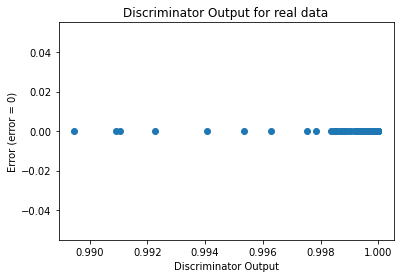

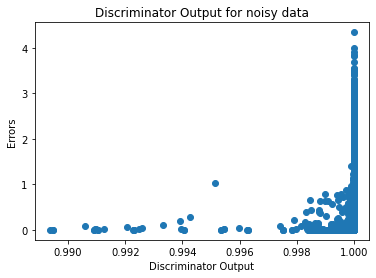

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8156]], device='cuda:0', requires_grad=True)
